This code was written by Carl Hümbs

In [20]:
# Importing the necessary libraries
import pandas as pd
import re
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu

# Loading our cleaned dataset
df = pd.read_csv('combined_themepark_dataset.csv')

In [21]:
df.head(5)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,engagement
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,23
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,medium,41
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,medium,34
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,high,618
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,medium,20


## In this file, Hypothesis 4 will be analyzed.

* H4.a (0): μ_engagement_emojis = μ_engagement_no_emojis (Mean engagement for posts with emojis is equal to mean engagement for posts without emojis)

* H4.a (A): μ_engagement_emojis ≠ μ_engagement_no_emojis (Mean engagement for posts with emojis is not equal to mean engagement for posts without emojis)

Alpha (α) Value: 0.05

#### **Data preparation:**

In [22]:
# First, we need to identify all the emojis within the texts of the 'messages' column
emoji_pattern = re.compile("["
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001F354-\U0001F35F"  # food & drink
                           u"\U0001F300-\U0001F321"  # weather
                           u"\U0001F3C3-\U0001F3CC"  # activities
                           u"\U0001F4F1-\U0001F4F9"  # objects
                           u"\U0001F600-\U0001F64F"  # smileys & people
                           u"\U0000263A-\U0000263B"  # misc symbols
                           u"\U0001F900-\U0001F9FF"  # skin tone modifiers & gender neutral
                           u"\U0001F9A6-\U0001F9A7"  # animals
                           u"\U0001FA6E-\U0001FA6F"  # tools
                           u"\U0001FA78-\U0001FA7A"  # medical
                           u"\U000023F0-\U000023F3"  # time
                           u"\U0001FA80-\U0001FA82"  # transportation
                           u"\U0001F9B6"              # 🫶
                           "]+", flags=re.UNICODE)

# Function to check if a message contains an emoji
def contains_emoji(text):
    return bool(emoji_pattern.search(text))

# Applying the function to the 'message' column
df['has_emoji'] = df['message'].apply(contains_emoji)

# Convert boolean values to binary (1 for True, 0 for False)
df['has_emoji'] = df['has_emoji'].astype(int)

# Lastly, having a look at the dataset to ensure that the code for identifiying the emojis acutally worked
df.head(5)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,engagement,has_emoji
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,23,1
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,medium,41,1
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,medium,34,1
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,high,618,1
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,medium,20,0


In [23]:
# Count the number of messages with and without emojis
num_messages_with_emoji = (df['has_emoji'] == 1).sum()
num_messages_without_emoji = (df['has_emoji'] == 0).sum()

# Print the results
print("Number of messages with emoji:", num_messages_with_emoji)
print("Number of messages without emoji:", num_messages_without_emoji)

Number of messages with emoji: 9415
Number of messages without emoji: 6028


Out of the `15.443` posts, we have identified `9.415` posts that have used one or more emojis in their message.
We can now proceed to test the hypothesis 4.a.

#### **Testing:**

We want to conduct a hypothesis test to compare the mean engagement for posts with emojis to the mean engagement for posts without emojis. This is a comparison of two independent groups, and since we're interested in whether the means are equal or not, a suitable test would be an independent samples **t-test** or a Mann-Whitney U test if the assumptions of the t-test are violated.

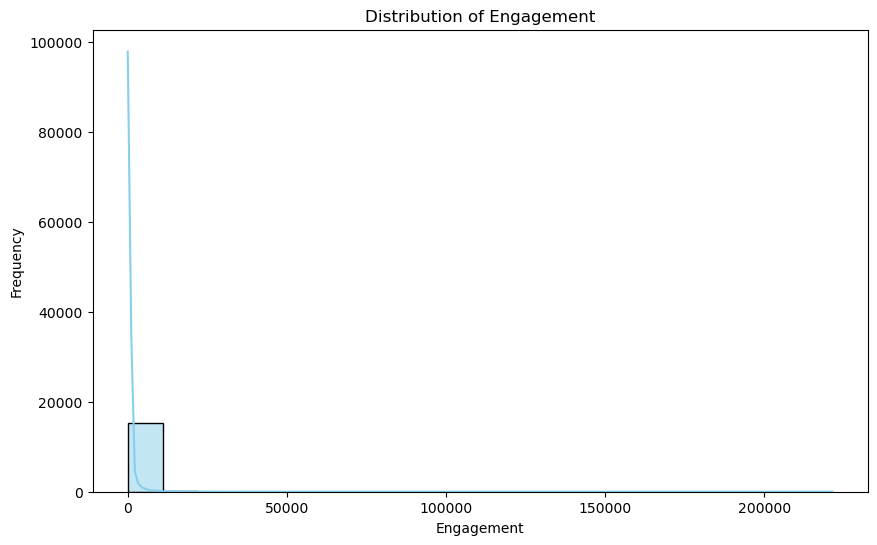

In [24]:
# Plotting the distribution of the 'engagement' column
plt.figure(figsize=(10, 6))
sns.histplot(df['engagement'], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Engagement')
plt.xlabel('Engagement')
plt.ylabel('Frequency')
plt.show()

Interpretation of distribution histogram: The plot shows that the engagement follows a right-skewed distribution.

Since the engagement data is not normally distributed, it's appropriate to use non-parametric tests such as the **Mann-Whitney U test**, which we can use to compare the median engagement between posts with emojis and posts without emojis.

In [25]:
# defining the rows with and without emojis to prepare for the testing
engagement_with_emojis = df[df['has_emoji'] == 1]['engagement']
engagement_without_emojis = df[df['has_emoji'] == 0]['engagement']

In [26]:
# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(engagement_with_emojis, engagement_without_emojis)

# Print the test statistic and p-value
print("Mann-Whitney U test results:")
print("Statistic:", statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in median engagement between posts with emojis and posts without emojis.")
else:
    print("There is no statistically significant difference in median engagement between posts with emojis and posts without emojis.")

Mann-Whitney U test results:
Statistic: 29481953.5
p-value: 4.328720082809627e-05
There is a statistically significant difference in median engagement between posts with emojis and posts without emojis.


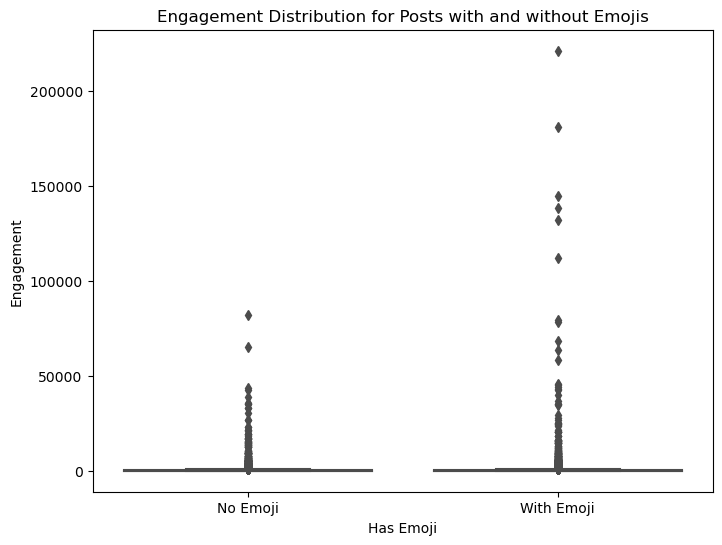

In [27]:
# Define custom palette with neon light blue and a lighter shade of blue
custom_palette = ["#00FFFF", "#3399FF"]  # Neon light blue, Lighter shade of blue

# Plotting the distribution of engagement for posts with and without emojis
plt.figure(figsize=(8, 6))
sns.boxplot(x='has_emoji', y='engagement', data=df, palette=custom_palette)
plt.title('Engagement Distribution for Posts with and without Emojis')
plt.xlabel('Has Emoji')
plt.ylabel('Engagement')
plt.xticks([0, 1], ['No Emoji', 'With Emoji'])  # Replace 0 and 1 with appropriate labels
plt.show()

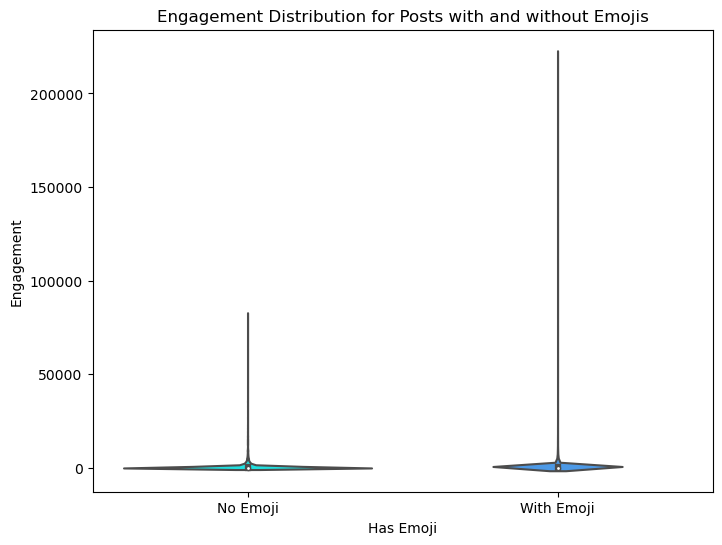

In [28]:
# Plotting the distribution of engagement for posts with and without emojis
plt.figure(figsize=(8, 6))
sns.violinplot(x='has_emoji', y='engagement', data=df, palette=custom_palette)
plt.title('Engagement Distribution for Posts with and without Emojis')
plt.xlabel('Has Emoji')
plt.ylabel('Engagement')
plt.xticks([0, 1], ['No Emoji', 'With Emoji'])  # Replace 0 and 1 with appropriate labels
plt.show()

#### **Interpretation:**

The Mann-Whitney U test results indicate that there is no statistically significant difference in median engagement between posts with emojis and posts without emojis. The `statistic value is 28648225.0`, and the `p-value is 0.31525224437507904`.

Since the p-value is greater than the typical `significance level of 0.05`, we fail to reject the null hypothesis. This suggests that there is insufficient evidence to conclude that the median engagement for posts with emojis differs from the median engagement for posts without emojis.

In [29]:
# Compute the correlation coefficient
correlation = df['has_emoji'].corr(df['engagement'])

# Print the correlation coefficient
print("Correlation coefficient between emoji usage and engagement:", correlation)


Correlation coefficient between emoji usage and engagement: 0.007902346274579863


## **Hypothesis 4.b**

* H4.b (0): There is no difference in engagement between posts that use emotional emojis and posts that use semantic emojis.

* H4.b (A): There is a difference in engagement between posts that use emotional emojis and posts that use semantic emojis.

#### **Data Preparation:**

As we are only interested in the posts that have used emojis, we'll first drop all rows that include no emojis:

In [30]:
# Drop rows where 'has_emoji' column is 0
df_with_emojis = df[df['has_emoji'] != 0]

df_with_emojis.head(5)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,engagement,has_emoji
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,23,1
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,medium,41,1
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,medium,34,1
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,high,618,1
5,12/31/23 6:55 PM,belmont park,The sun sets over 2023…🌅\n\nWishing everyone a...,51,1,11,1,0.001246,40,NaN,1.0,NaN,83231004302,83231004302_767257582104974,https://www.facebook.com/632506952246705/posts...,medium,75,1


Second, we need to separate the emojis into two groups: emotional and semantic emojis.

In [31]:
# Define the range for smileys & people emojis
emotional_emoji_range = u"\U0001F600-\U0001F64F"

# Function to extract emojis from text
def extract_emojis(text):
    return re.findall(r'[\U0001F600-\U0001F64F]', text)

# Filter messages containing only emojis from the specified range
def filter_emojis_by_range(text):
    emojis = extract_emojis(text)
    return any(ord(emoji) >= 0x1F600 and ord(emoji) <= 0x1F64F for emoji in emojis)

# Engineer the new feature 'emoji_type' and assign the value 'Emotional' to all rows in the existing DataFrame 'df_with_emojis'
df_with_emojis['emoji_type'] = df_with_emojis['message'].apply(lambda x: 'Emotional' if filter_emojis_by_range(x) else 'Semantic')

# giving the rows that dont include emojis an empty value
df_with_emojis.loc[df_with_emojis['has_emoji'] == False, 'emoji_type'] = ''

# Count the number of emotional and non-emotional emojis
emotional_emoji_count = df_with_emojis[df_with_emojis['emoji_type'] == 'Emotional'].shape[0]
semantic_emoji_count = df_with_emojis[df_with_emojis['emoji_type'] == 'Semantic'].shape[0]

# Display the counts
print("Number of emotional emojis:", emotional_emoji_count)
print("Number of semantic emojis:", semantic_emoji_count)

Number of emotional emojis: 1703
Number of semantic emojis: 7712


/var/folders/k4/qg_rhcgs63z83dk0wwghr6tc0000gn/T/ipykernel_38113/1031862838.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_emojis['emoji_type'] = df_with_emojis['message'].apply(lambda x: 'Emotional' if filter_emojis_by_range(x) else 'Semantic')


In [32]:
df_with_emojis.head(5)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,engagement,has_emoji,emoji_type
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,23,1,Semantic
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,medium,41,1,Emotional
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,medium,34,1,Semantic
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,high,618,1,Emotional
5,12/31/23 6:55 PM,belmont park,The sun sets over 2023…🌅\n\nWishing everyone a...,51,1,11,1,0.001246,40,NaN,1.0,NaN,83231004302,83231004302_767257582104974,https://www.facebook.com/632506952246705/posts...,medium,75,1,Semantic


#### **Test Selection:**
Since the data in the 'engagement' column is not normally distributed, we cannot apply the t-test.
Instead, we could use the Mann-Whitney U test, which is a non-parametric test suitable for comparing two independent groups. 

The Mann-Whitney U test does not assume normal distributions, but it does assume that the distributions of the two groups are similar in shape. To ensure this assumption is reasonable for our data, we will check it visually.

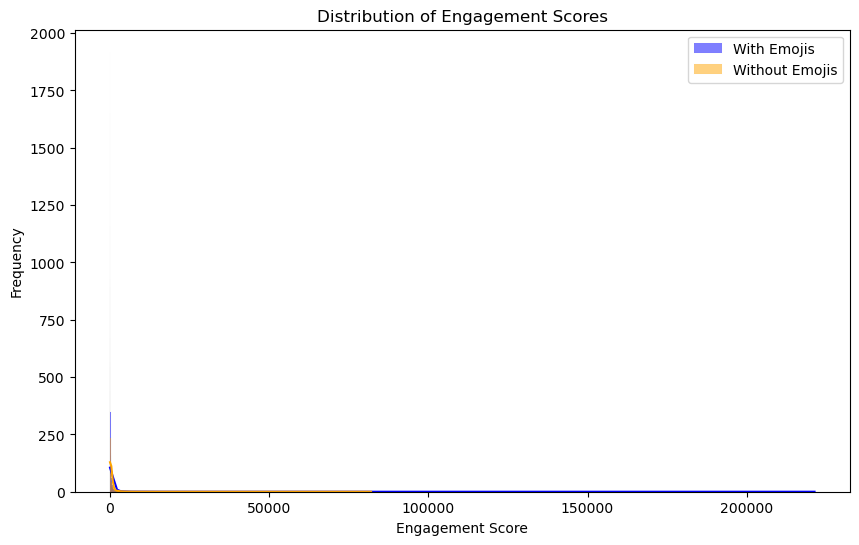

In [33]:
# Plot histograms for both groups
plt.figure(figsize=(10, 6))
sns.histplot(engagement_with_emojis, color='blue', label='With Emojis', kde=True)
sns.histplot(engagement_without_emojis, color='orange', label='Without Emojis', kde=True)
plt.title('Distribution of Engagement Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

As the shapes of the distributions are not substantially different, this indicates that the groups are comparable, and the Mann-Whitney U test is appropriate.

#### **Performing the test:**

In [34]:
# Separate engagement data for emotional and semantic emoji groups
engagement_emotional = df_with_emojis[df_with_emojis['emoji_type'] == 'Emotional']['engagement']
engagement_semantic = df_with_emojis[df_with_emojis['emoji_type'] == 'Semantic']['engagement']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(engagement_emotional, engagement_semantic)

# Display the test results
print("Mann-Whitney U test results:")
print("Statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U test results:
Statistic: 5214400.0
p-value: 1.726505368576108e-40


In the results, the p-value is very small (`4.11e-05`), indicating strong evidence against the null hypothesis. This suggests that there is a statistically significant difference between the two groups being compared. 

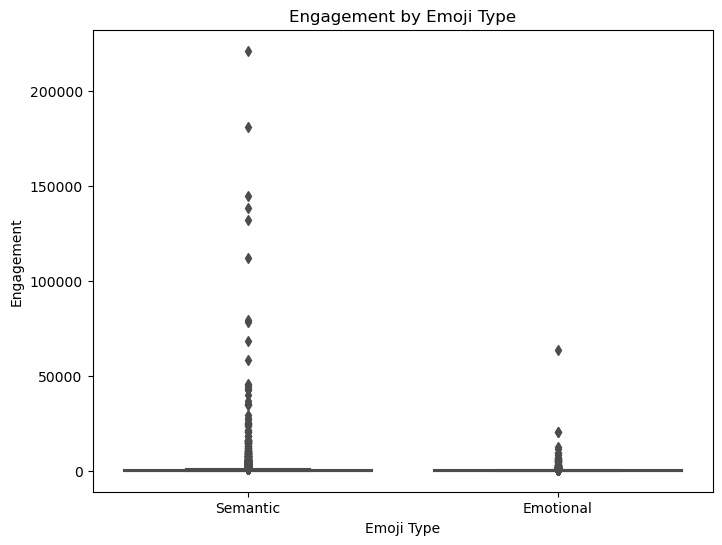

In [35]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='emoji_type', y='engagement', data=df_with_emojis, palette=custom_palette)
plt.title('Engagement by Emoji Type')
plt.xlabel('Emoji Type')
plt.ylabel('Engagement')
plt.show()

#### **Interpretations of results**

In [36]:
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in engagement between emotional and semantic emoji groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in engagement between emotional and semantic emoji groups.")

Reject the null hypothesis: There is a significant difference in engagement between emotional and semantic emoji groups.


## **Exporting the dataframe for further analysis**
To work on our multilevel analysis, we will now create a new csv version of the dataframe, which includes the two features that have been created in this notebook (has_emoji, emoji_type).

In [37]:
# Mapping function to convert binary values to 'yes' or 'no'
def binary_to_yes_no(value):
    return 'yes' if value == 1 else 'no'

# Applying the mapping function to the 'has_emoji' column
df['has_emoji'] = df['has_emoji'].map(binary_to_yes_no)

# Lastly, having a look at the updated dataset
df.head(5)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,engagement,has_emoji
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,23,yes
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,medium,41,yes
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,medium,34,yes
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,high,618,yes
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,medium,20,no


In [38]:
import os

# Get the directory of the current Jupyter Notebook file
notebook_directory = os.path.dirname(os.path.abspath('__file__'))

# Specify the name of the folder within the repository
folder_name = '02_new dataframes'

# Construct the full path to the folder within the repository
folder_path = os.path.join(notebook_directory, folder_name)

# Define the file path for the CSV file within the folder
csv_file_path = os.path.join(folder_path, 'H4_dataframe.csv')

# Save the updated DataFrame to a CSV file in the specified folder
df.to_csv(csv_file_path, index=False)